# Dataset Visualization

In [1]:
import pandas as pd
import numpy as np
from src.models.utils.data import FoodPricingDataset
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision.transforms import Compose, Resize, ToTensor
import torch
from typing import Tuple
from IPython.display import display, Image

### Length of datasets

We first analyze the size of the dataset and respectively of the train, dev, and test set.

In [2]:
dataset = FoodPricingDataset(
    img_transform=lambda _: _,
    txt_transform=lambda _: _,
    split=None,
)

print(f"The length of the whole dataset is: {len(dataset)} rows")

The length of the whole dataset is: 7061 rows


In [3]:
df = dataset.data

len_dev = len(df[df["split"] == "dev"])
len_test = len(df[df["split"] == "test"])

def print_len(split: str) -> None:
    len_split = len(df[df["split"] == split])
    print(f"Length of {split} set: {len_split} ({round(100*(len_split) / len(dataset))}%)")


for split in ["train", "dev", "test"]:
    print_len(split)

Length of train set: 4942 (70%)
Length of dev set: 1059 (15%)
Length of test set: 1060 (15%)


### Analysis of the training dataset

#### Sample tuples (price, image, text)

In [4]:
img_transform = Compose(
    [
        Resize(size=(224, 224)),
        ToTensor(),
    ]
)

training_data = FoodPricingDataset(
    img_transform=img_transform, txt_transform=lambda x: x, split="train"
)

In [5]:
def save_grid_img(data: FoodPricingDataset, text: bool = False) -> None:
    ncols, nrows = 3, 3
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
    if not text:
        fig.tight_layout()
    sample_idxs = torch.randint(len(data), size=(ncols, nrows))
    props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)

    for row in range(nrows):
        for col in range(ncols):
            sample = data[int(sample_idxs[row, col])]
            axs[row, col].set_title(f"Price: {sample['label'].numpy()[0] / 100:,.2f}€")
            axs[row, col].imshow(sample["img"].permute(1, 2, 0))
            if text:
                textstr = sample["txt"]
                axs[row, col].text(
                    0.05,
                    0.95,
                    textstr,
                    transform=axs[row, col].transAxes,
                    fontsize=11,
                    # horizontalalignment="center",
                    verticalalignment="top",
                    bbox=props,
                    wrap=True,
                )
            axs[row, col].set_axis_off()
    plt.savefig("images/04.01_sample_products.jpg")

In [6]:
def save_multiple_imgs(data: FoodPricingDataset, text: bool = False, n_imgs: int = 9) -> None:
    sample_idxs = torch.randint(len(data), size=(n_imgs,))
    props = dict(boxstyle="round", facecolor="wheat", alpha=0.7)
    
    for i in range(n_imgs):
        fig, ax = plt.subplots(figsize=(4, 4))
        sample = data[int(sample_idxs[i])]
        ax.set_title(f"Price: {sample['label'].numpy()[0] / 100:,.2f}€")
        ax.imshow(sample["img"].permute(1, 2, 0))
        if text:
            textstr = sample["txt"]
            ax.text(
                0.50,
                0.95,
                textstr,
                transform=ax.transAxes,
                fontsize=11,
                horizontalalignment="center",
                verticalalignment="top",
                bbox=props,
                wrap=True,
            )
        ax.set_axis_off()
        prefix = ("0"+str(i+1)) if i<9 else str(i+1)
        fpath = f"images/04.01_sample_img_{prefix}.jpg"
        fig.savefig(fpath)
        plt.close()

# save_multiple_imgs(training_data, text=True, n_imgs=9)

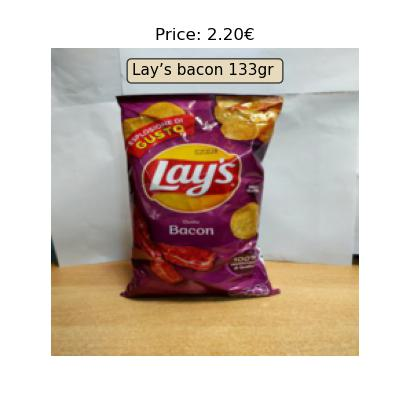

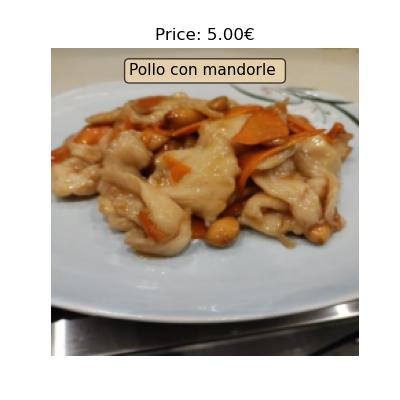

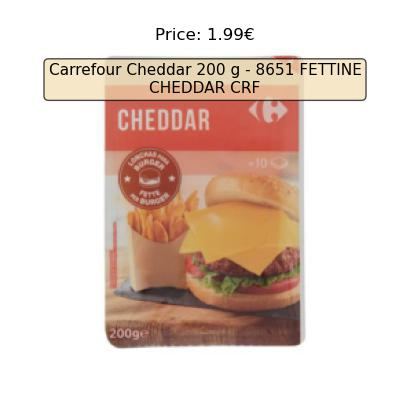

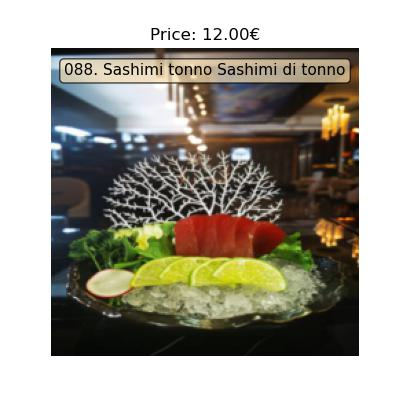

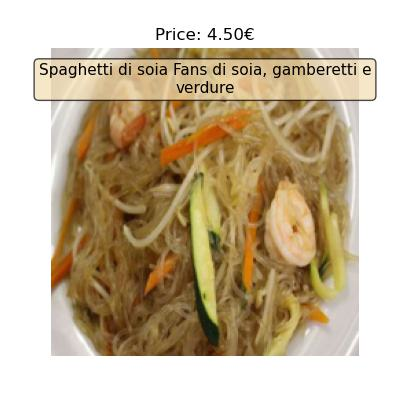

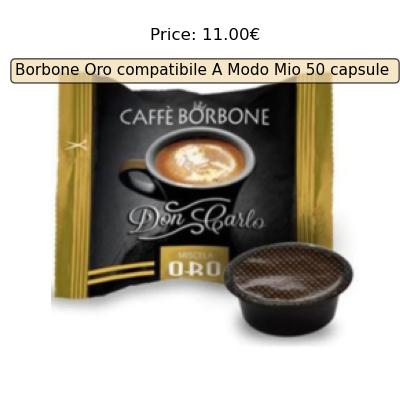

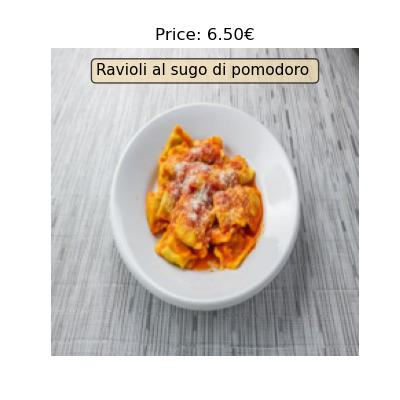

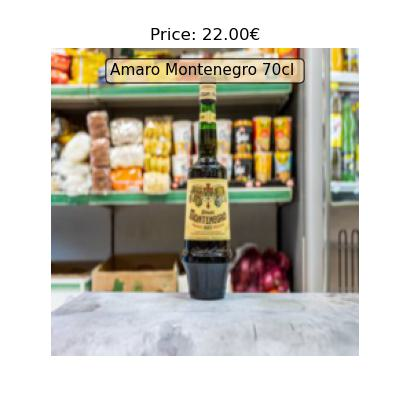

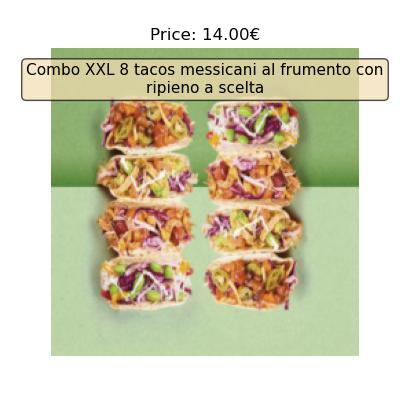

In [7]:
for i in range(9):
    display(Image(filename=f"images/04.01_sample_img_0{i+1}.jpg"))